In [1]:
# Disable warnings in the notebook to maintain clean output cells
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import cv2
import yaml
from PIL import Image
from collections import deque
from ultralytics import YOLO
from IPython.display import Video

In [2]:
# Configure the visual appearance of Seaborn plots
sns.set_theme(rc={'axes.facecolor': '#ffe4de'}, style='darkgrid')

In [3]:
# Load the pre-trained YOLOv8 nano segmentation model
model = YOLO('yolov8n-seg.pt')

In [4]:
# Define the dataset_path
dataset_path = './datasets/Pothole_Segmentation_YOLOv8'

# Set the path to the YAML file
yaml_file_path = os.path.join(dataset_path, 'data.yaml')

# Load and print the contents of the YAML file
with open(yaml_file_path, 'r') as file:
    yaml_content = yaml.load(file, Loader=yaml.FullLoader)
    print(yaml.dump(yaml_content, default_flow_style=False))

names:
- Pothole
nc: 1
roboflow:
  license: CC BY 4.0
  project: pothole_segmentation_yolov8
  url: https://universe.roboflow.com/farzad/pothole_segmentation_yolov8/dataset/1
  version: 1
  workspace: farzad
train: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/datasets/Pothole_Segmentation_YOLOv8/train/images
val: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/datasets/Pothole_Segmentation_YOLOv8/valid/images



In [5]:
# Set paths for training and validation image sets
train_images_path = os.path.join(dataset_path, 'train', 'images')
valid_images_path = os.path.join(dataset_path, 'valid', 'images')

# Initialize counters for the number of images
num_train_images = 0
num_valid_images = 0

# Initialize sets to hold the unique sizes of images
train_image_sizes = set()
valid_image_sizes = set()

# Check train images sizes and count
for filename in os.listdir(train_images_path):
    if filename.endswith('.jpg'):  
        num_train_images += 1
        image_path = os.path.join(train_images_path, filename)
        with Image.open(image_path) as img:
            train_image_sizes.add(img.size)

# Check validation images sizes and count
for filename in os.listdir(valid_images_path):
    if filename.endswith('.jpg'): 
        num_valid_images += 1
        image_path = os.path.join(valid_images_path, filename)
        with Image.open(image_path) as img:
            valid_image_sizes.add(img.size)

# Print the results
print(f"Number of training images: {num_train_images}")
print(f"Number of validation images: {num_valid_images}")

# Check if all images in training set have the same size
if len(train_image_sizes) == 1:
    print(f"All training images have the same size: {train_image_sizes.pop()}")
else:
    print("Training images have varying sizes.")

# Check if all images in validation set have the same size
if len(valid_image_sizes) == 1:
    print(f"All validation images have the same size: {valid_image_sizes.pop()}")
else:
    print("Validation images have varying sizes.")

Number of training images: 720
Number of validation images: 60
All training images have the same size: (640, 640)
All validation images have the same size: (640, 640)


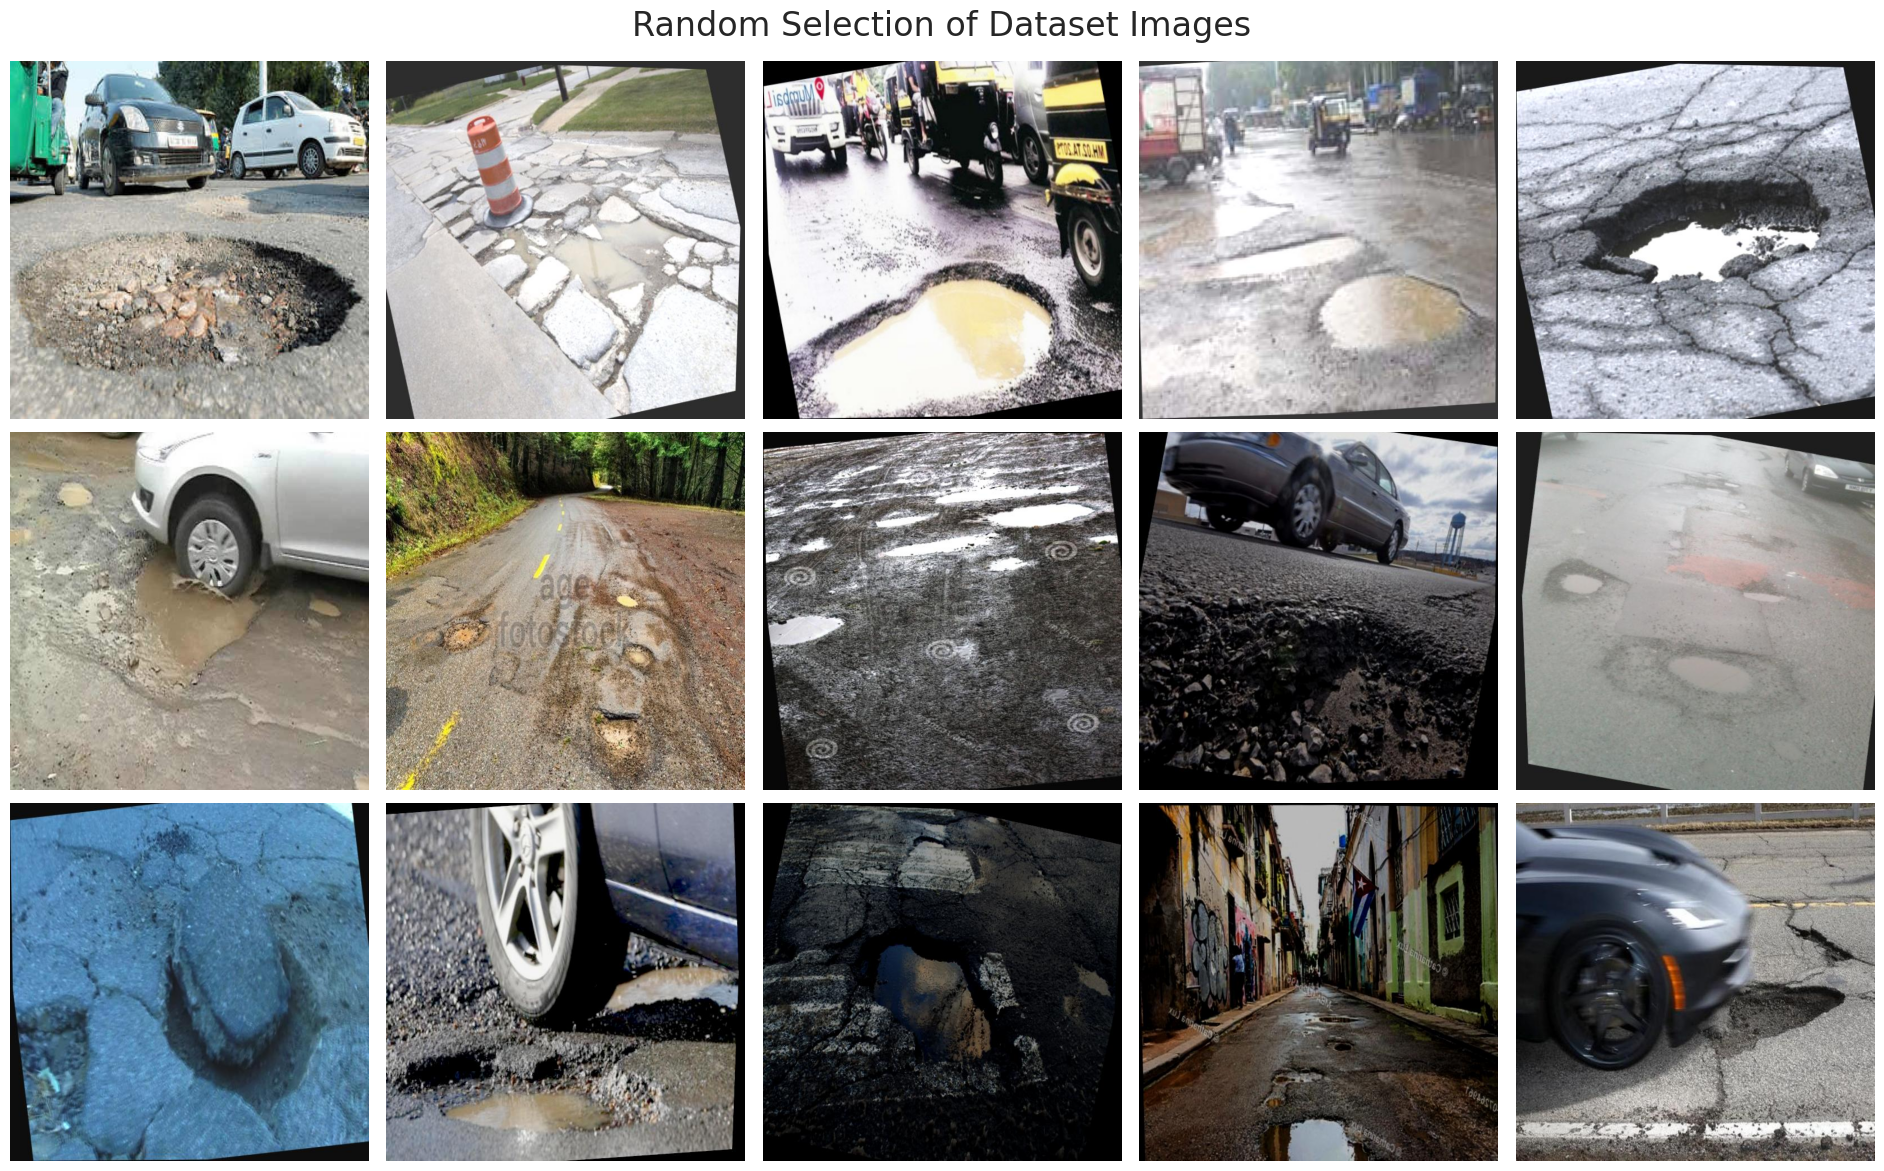

In [6]:
# Set the seed for the random number generator
random.seed(0)

# Create a list of image files
image_files = [f for f in os.listdir(train_images_path) if f.endswith('.jpg')]

# Randomly select 15 images
random_images = random.sample(image_files, 15)

# Create a new figure
plt.figure(figsize=(19, 12))

# Loop through each image and display it in a 3x5 grid
for i, image_file in enumerate(random_images):
    image_path = os.path.join(train_images_path, image_file)
    image = Image.open(image_path)
    plt.subplot(3, 5, i + 1)
    plt.imshow(image)
    plt.axis('off')

# Add a suptitle
plt.suptitle('Random Selection of Dataset Images', fontsize=24)

# Show the plot
plt.tight_layout()
plt.show()

# Deleting unnecessary variable to free up memory
del image_files

In [7]:
# Train the model on our custom dataset
results = model.train(
    data=yaml_file_path,     # Path to the dataset configuration file
    epochs=1,              # Number of epochs to train for
    imgsz=640,               # Size of input images as integer
    patience=15,             # Epochs to wait for no observable improvement for early stopping of training
    batch=16,                # Number of images per batch
    optimizer='auto',        # Optimizer to use, choices=[SGD, Adam, Adamax, AdamW, NAdam, RAdam, RMSProp, auto]
    lr0=0.0001,              # Initial learning rate 
    lrf=0.01,                # Final learning rate (lr0 * lrf)
    dropout=0.25,            # Use dropout regularization
    #device=1,                # Device to run on, i.e. cuda device=0 
    seed=42                  # Random seed for reproducibility
)

New https://pypi.org/project/ultralytics/8.3.20 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.9 🚀 Python-3.10.13 torch-2.4.1+cu121 CPU (Intel Core(TM) i5-8250U 1.60GHz)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=./datasets/Pothole_Segmentation_YOLOv8/data.yaml, epochs=1, time=None, patience=15, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train15, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.25, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False

100%|██████████| 755k/755k [00:02<00:00, 361kB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/datasets/Pothole_Segmentation_YOLOv8/train/labels... 720 images, 0 backgrounds, 0 corrupt: 100%|██████████| 720/720 [00:00<00:00, 936.21it/s]

train: New cache created: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/datasets/Pothole_Segmentation_YOLOv8/train/labels.cache



val: Scanning /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/datasets/Pothole_Segmentation_YOLOv8/valid/labels... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<00:00, 787.00it/s]

val: New cache created: /home/lorenzo/Documenti/GitHub/Computer-Science-Sapienza/Computer Vision/project/datasets/Pothole_Segmentation_YOLOv8/valid/labels.cache


Plotting labels to runs/segment/train15/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 72 weight(decay=0.0), 83 weight(decay=0.0005), 82 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/segment/train15
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        1/1         0G      1.451      2.848      2.502      1.423         81        640: 100%|██████████| 45/45 [07:06<00:00,  9.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:17<00:00,  8.55s/it]


                   all         60        201    0.00956      0.856      0.245      0.117    0.00933      0.836      0.232      0.111

1 epochs completed in 0.127 hours.
Optimizer stripped from runs/segment/train15/weights/last.pt, 6.1MB
Optimizer stripped from runs/segment/train15/weights/best.pt, 6.1MB

Validating runs/segment/train15/weights/best.pt...
Ultralytics 8.3.9 🚀 Python-3.10.13 torch-2.4.1+cu121 CPU (Intel Core(TM) i5-8250U 1.60GHz)
YOLOv8n-seg summary (fused): 213 layers, 2,936,979 parameters, 0 gradients, 10.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.82s/it]


                   all         60        201     0.0095      0.851      0.245      0.117    0.00933      0.836      0.232      0.111
Speed: 3.0ms preprocess, 158.0ms inference, 0.0ms loss, 7.0ms postprocess per image
Results saved to runs/segment/train15


In [5]:
# Define the path to the directory
post_training_files_path = './runs/segment/train15'

# List the files in the directory
!ls {post_training_files_path}

args.yaml					  MaskPR_curve.png
BoxF1_curve.png					  MaskR_curve.png
BoxP_curve.png					  results.csv
BoxPR_curve.png					  results.png
BoxR_curve.png					  train_batch0.jpg
confusion_matrix_normalized.png			  train_batch1.jpg
confusion_matrix.png				  train_batch2.jpg
events.out.tfevents.1729701359.lorenzo-pc.5323.0  val_batch0_labels.jpg
labels_correlogram.jpg				  val_batch0_pred.jpg
labels.jpg					  val_batch1_labels.jpg
MaskF1_curve.png				  val_batch1_pred.jpg
MaskP_curve.png					  weights


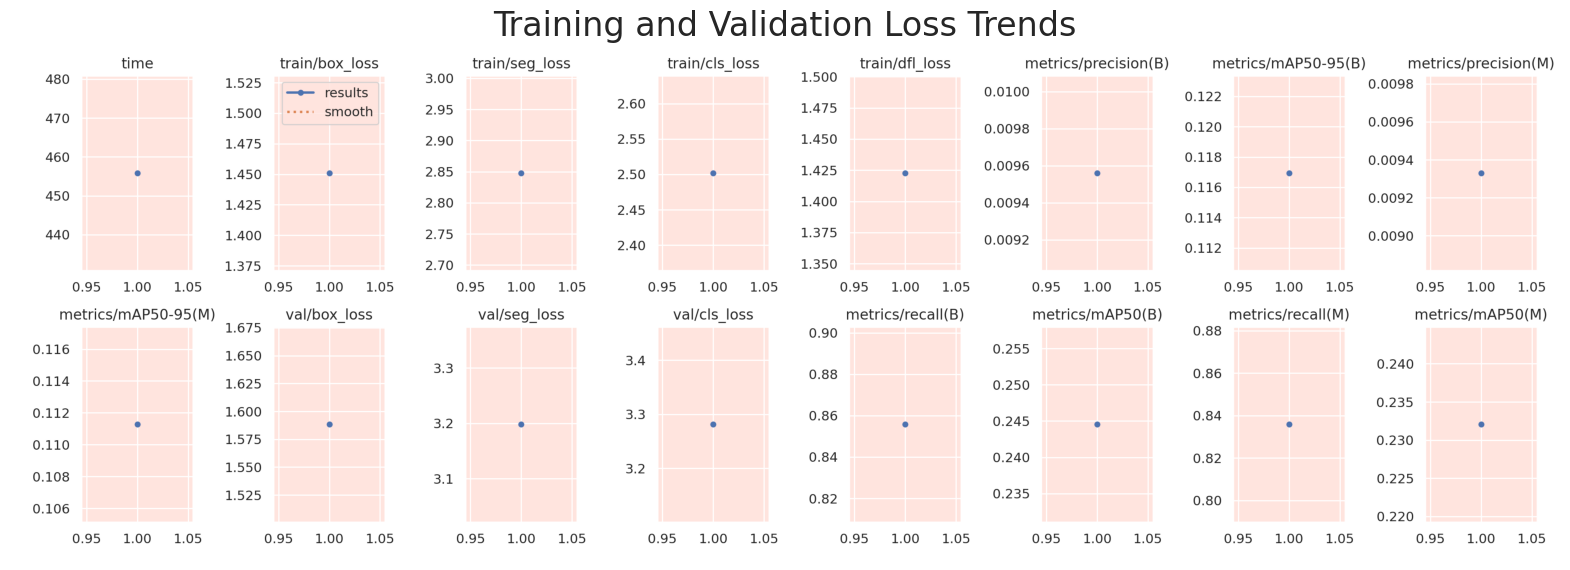

In [6]:
# Create the full file path by joining the directory path with the filename
results_file_path = os.path.join(post_training_files_path, 'results.png')

# Read the image using cv2
image = cv2.imread(results_file_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  

# Display the image using matplotlib
plt.figure(figsize=(20, 8))
plt.imshow(image)
plt.title('Training and Validation Loss Trends', fontsize=24)
plt.axis('off') 
plt.show()

In [14]:
# Define a function to plot learning curves for loss values
def plot_learning_curve(df, train_loss_col, val_loss_col, title, ylim_range=[0,2]):
    plt.figure(figsize=(12, 4))
    sns.lineplot(data=df, x='epoch', y=train_loss_col, label='Train Loss', color='blue', linestyle='-', linewidth=2)
    sns.lineplot(data=df, x='epoch', y=val_loss_col, label='Validation Loss', color='#ed2f00', linestyle='--', linewidth=2)
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.ylim(ylim_range)
    plt.legend()
    plt.show()

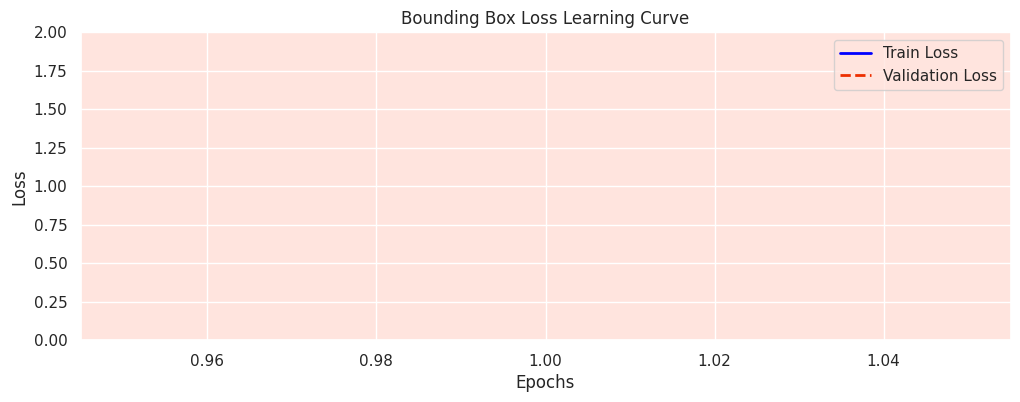

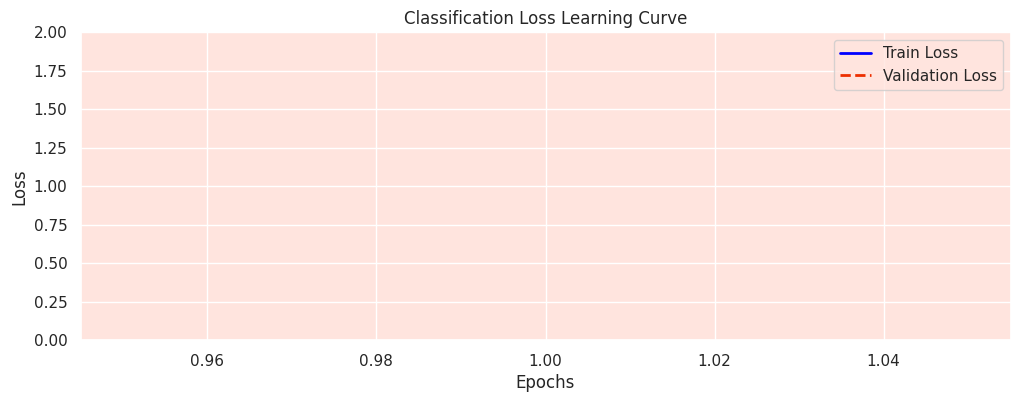

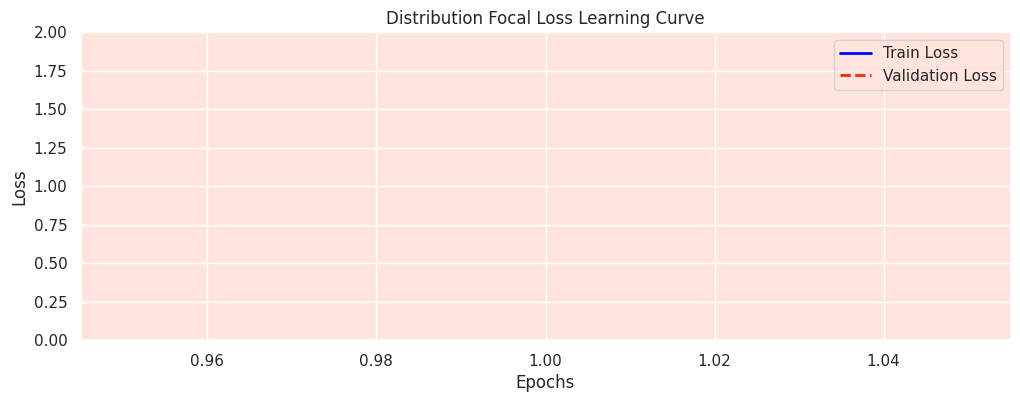

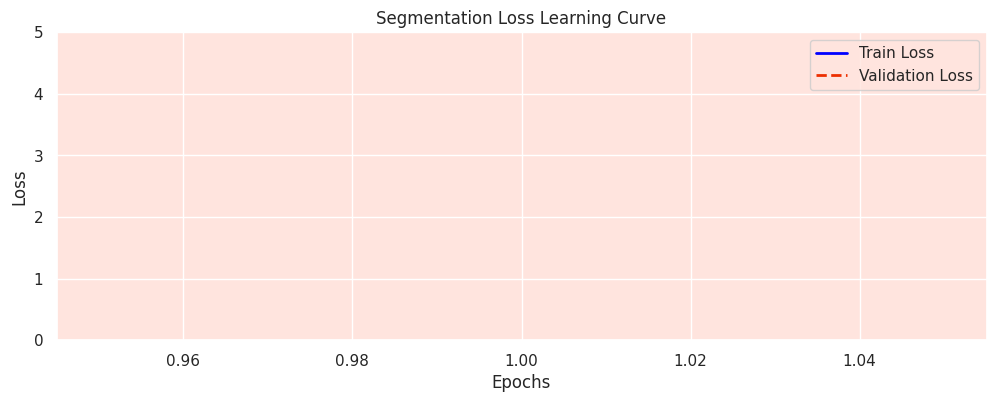

In [15]:
# Create the full file path for 'results.csv' using the directory path and file name
results_csv_path = os.path.join(post_training_files_path, 'results.csv')

# Load the CSV file from the constructed path into a pandas DataFrame
df = pd.read_csv(results_csv_path)

# Remove any leading whitespace from the column names
df.columns = df.columns.str.strip()

# Plot the learning curves for each loss
plot_learning_curve(df, 'train/box_loss', 'val/box_loss', 'Bounding Box Loss Learning Curve')
plot_learning_curve(df, 'train/cls_loss', 'val/cls_loss', 'Classification Loss Learning Curve')
plot_learning_curve(df, 'train/dfl_loss', 'val/dfl_loss', 'Distribution Focal Loss Learning Curve')
plot_learning_curve(df, 'train/seg_loss', 'val/seg_loss', 'Segmentation Loss Learning Curve', ylim_range=[0,5])